In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [13]:
path = 'models/'
t = str(pd.to_datetime('today').date())
models = os.listdir(path)
models = [model for model in models if model.startswith(t)]
i = max([int(model[-1]) for model in models]) + 1
modelID = f'{t}_{i}'
os.mkdir(path + modelID)

In [9]:
matrix = np.loadtxt('Data/causality_matrix/form41_aggregated_monthly_short_TE.txt')
matrix = matrix[0:matrix.shape[1], :]
matrix.shape

(52, 52)

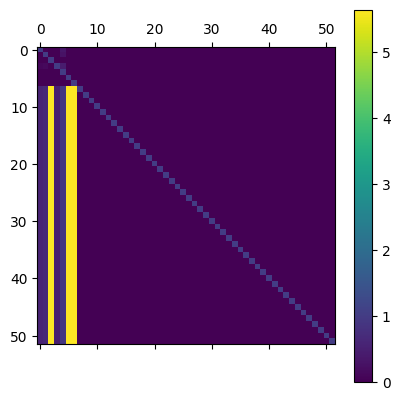

In [14]:
plt.matshow(matrix,)
cb = plt.colorbar()
plt.show()

In [7]:
datapath = 'Data/form41_subset_quarterly.csv'
data = pd.read_csv(datapath, delimiter=',')

# remove rows with NaN values
data = data.dropna(axis=0)
# extract one carrier with the most rows
carrier = data['AIRLINE_ID'].value_counts().idxmax()
data = data[data['AIRLINE_ID'] == carrier]

In [8]:
data.shape

(16, 273)

In [9]:
data.to_csv('Data/form41_subset_quarterly_Southwest.csv', index=False)

In [12]:
data = pd.read_csv('Data/form41_aggregated_quarterly_southwest.csv', delimiter=',')

In [13]:
data.head()

,AIRLINE_ID,YEAR,QUARTER,PASSENGERS,FREIGHT,MAIL_x,DISTANCE,UNIQUE_CARRIER_NAME,US_CARRIER,LARGE_USCARRIER,...,AD_EXPENSE,ADMIN_EXPENSE,DEPR_EXP_MAINT,AMORTIZATION_y,TRANSPORT_EXP,TOTAL_OP_EXPENSE,MAINT_PROP_EQUIP,DEPR_PROP_EQUIP,MAINT_DEPR,SVC_SALES_OP_EXP
0,19393,1990,1,4999900,6313881,6139053,2299766,Southwest Airlines Co.,1,1,...,4726.81,23403.22,51.26,0.0,1290.49,252515.38,1103.95,3334.63,4438.58,120739.52
1,19393,1990,2,5750946,7100492,6095243,2303918,Southwest Airlines Co.,1,1,...,9122.80,30913.01,51.70,0.0,1458.08,266972.66,1050.88,3175.03,4225.91,141322.10
2,19393,1990,3,5955645,7200096,5702706,2338327,Southwest Airlines Co.,1,1,...,7577.86,27762.60,54.17,0.0,1362.82,279911.10,1132.80,3363.46,4496.26,137232.29
3,19393,1990,4,5357638,7908446,8584344,2488265,Southwest Airlines Co.,1,1,...,9610.62,20625.67,54.01,0.0,1450.37,305815.90,942.07,3496.28,4438.35,136165.18
4,19393,1991,1,5817348,8111289,6901716,2569307,Southwest Airlines Co.,1,1,...,8246.78,22943.00,53.95,0.0,1427.65,293564.97,1084.54,3532.65,4617.18,141389.79


In [17]:
num_columns_with_nans = data.isna().all().sum()
print(num_columns_with_nans)




0
135


136